In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii, fits
from astroquery.vizier import Vizier
from astropy.table import Table
import splat

%matplotlib inline


Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database
Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database


In [2]:
DATA_FOLDER='/users/caganze/research/J1624/data/'
FIG_FOLDER='/users/caganze/research/J1624/figures/'

In [3]:
#kiman catalog
data=pd.read_hdf(DATA_FOLDER+'/merged_Mdwarfs.h5', key='merged')

In [4]:
np.array(list(data.columns))

array(['PLATE', 'MJD', 'FIBER', 'OBJID', 'RA_x', 'DEC_x', 'MJD_R', 'RV_x',
       'SPT_x', 'EWHA_x', 'EWHAERR', 'HASN', 'HADIFF', 'EWHB', 'EWHBERR',
       'HBSN', 'HBDIFF', 'EWHG', 'EWHGERR', 'HGSN', 'HGDIFF', 'EWHD',
       'EWHDERR', 'HDSN', 'HDDIFF', 'EWCAK', 'EWCAKERR', 'CAKSN',
       'CAKDIFF', 'TIO5', 'CAH1', 'CAH2', 'CAH3', 'TIO1', 'TIO2', 'TIO3',
       'TIO4', 'TIO5_2', 'TIO8', 'CAOH', 'TIO5ERR', 'CAH1ERR', 'CAH2ERR',
       'CAH3ERR', 'TIO1ERR', 'TIO2ERR', 'TIO3ERR', 'TIO4ERR', 'TIO5ERR2',
       'TIO8ERR', 'CAOHERR', 'DUP', 'DUPRV', 'DUPSPT', 'RUN', 'RERUN',
       'CAMCOL', 'FIELD', 'OBJ', 'PMRA_x', 'PMDEC_x', 'PMRAERR',
       'PMDECERR', 'MATCH', 'DIST22', 'NFIT', 'USNO_O', 'USNO_J', 'SIGRA',
       'SIGDEC', 'RA2MASS', 'DEC2MASS', 'JMAG', 'HMAG', 'KMAG', 'JERR',
       'HERR', 'KERR', 'MJD_2MASS_x', 'DIST', 'LGAL', 'BGAL', 'U', 'V',
       'W', 'X', 'Y', 'Z', 'VX', 'VY', 'VZ', 'RAD', 'THETA', 'VR', 'VT',
       'GOODPHOT', 'POSDUP', 'ACTHA_x', 'ACTHB', 'ACTHG', 'ACTHD'

In [5]:
def get_abs_mag(m, d):
    return m-5*np.log10(d/10.0)

In [6]:
mask=np.logical_and.reduce([data.photometric_sample_subg !=0,
                            data.photometric_sample_subred !=0,
                            data.GOODPHOT_SDSS ==1, 
                            data.GOODMATCH==1,
                            data.astrometric_sample==1,
                            abs(data.parallax_error/data.parallax)<0.2,
                           data.SPT_x <8.,
                           data.DIST < 50.0])

In [13]:
#data[mask]

Text(0, 0.5, 'M$_G$')

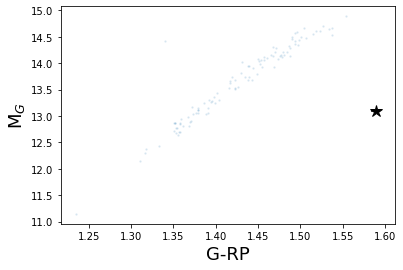

In [15]:
fig, ax=plt.subplots()
cx=ax.scatter(data.phot_g_mean_mag[mask]-data.phot_rp_mean_mag[mask], get_abs_mag(data.phot_g_mean_mag[mask],data.DIST[mask]),
        alpha=0.1, s=2)
ax.errorbar(12.6265-11.0375, get_abs_mag(14.2129, 16.7), xerr=(0.0045**2+0.0030**2)**0.5, fmt='*', ms=12, c='k')

#cx=ax1.scatter(data.phot_bp_mean_mag[mask]-data.phot_g_mean_mag[mask], get_abs_mag(data.phot_g_mean_mag[mask],data.DIST[mask]),
#           c= data['HALPHA'][mask],s=1. , alpha=0.3, vmin=-1, vmax=0.7)
#ax.errorbar
#cx=ax2.scatter(data.JMAG[mask]-data.KMAG[mask], get_abs_mag(data.JMAG[mask],data.DIST[mask]),
#           c= data['HALPHA'][mask],s=1. , alpha=0.3, vmin=-1, vmax=0.7)
plt.xlabel('G-RP', fontsize=18)
plt.ylabel(r'M$_G$', fontsize=18)
#cbar=plt.colorbar(cx)
#ax.set_xlim([0.0, 1.5])
#ax.set_ylim([4, 12])
#ax.invert_yaxis()
#ax1.invert_yaxis()
#ax2.invert_yaxis()
#cbar.ax.set_ylabel('Halpha', fontsize=18)

In [ ]:
#fits.open(DATA_FOLDER+'/MLSDSSGaiaDR2.fits')[1].header

In [ ]:
data.